In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Formalisme classique

## Un seul polariseur

In [2]:
# Lumière polarisée dans l'air en x a theta = 0 => cos(theta) = 1
E0 = 1
eta = 377

theta = np.linspace(0, 2*np.pi, 1000)
E = E0*np.cos(theta)

P0 = np.abs(E0)**2/(2*eta)
P = np.abs(E)**2/(2*eta)
P_class_2pol = P/P0

## Deux polariseurs

In [3]:
E2 = E*np.cos(theta)
P = np.abs(E2)**2/(2*eta)
P_class_3pol = P/P0

# Formalisme de Jones

In [4]:
# Matrice de polarisation avec rotation
def rot(theta):
    return np.array([[np.cos(theta), np.sin(theta)],
                    [-np.sin(theta), np.cos(theta)]])

def polariseur(theta):
    return rot(-theta)@np.array([[1 ,0], [0, 0]])@rot(theta)

## Un seul polariseur

In [5]:
P_vect = []

for angle in theta:
    J = polariseur(angle)@np.array([1,0])
    P = np.linalg.norm(J)**2/(2*eta)
    P_vect.append(P)
P0 = np.linalg.norm(np.array([1,0]))**2/(2*eta)

P_jones_2pol = P_vect/P0

## Deux polariseurs

In [6]:
P2_vect = []

for angle in theta:
    J = polariseur(angle)@np.array([1,0])
    J2 = polariseur(2*angle)@J
    P2 = np.linalg.norm(J2)**2/(2*eta)
    P2_vect.append(P2)
P0 = np.linalg.norm(np.array([1,0]))**2/(2*eta)

P_jones_3pol = P2_vect/P0

# Graphiques

In [7]:
# Function to simplify fractions and format labels
def format_tick_label(i):
    if i == 0:
        return "0"
    elif i == 1:
        return r"$\frac{\pi}{4}$"
    elif i == 2:
        return r"$\frac{\pi}{2}$"
    elif i == 3:
        return r"$\frac{3\pi}{4}$"
    elif i == 4:
        return r"$\pi$"
    elif i == 5:
        return r"$\frac{5\pi}{4}$"
    elif i == 6:
        return r"$\frac{3\pi}{2}$"
    elif i == 7:
        return r"$\frac{7\pi}{4}$"
    elif i == 8:
        return r"$2\pi$"

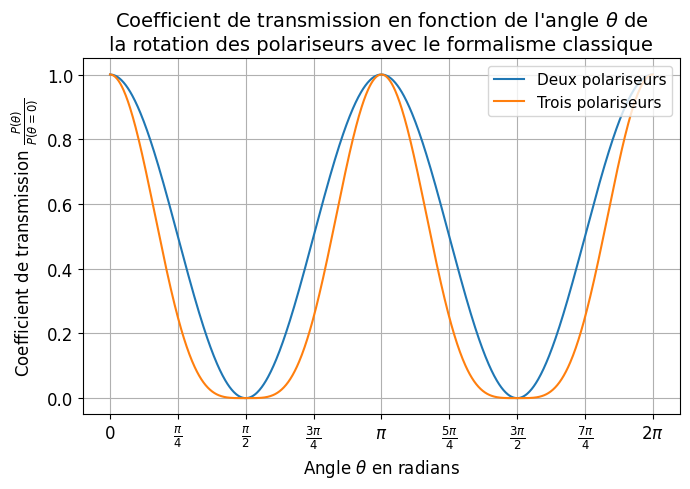

In [10]:
plt.figure(figsize=[7,5])
plt.plot(theta, P_class_2pol, label='Deux polariseurs')
plt.plot(theta, P_class_3pol, label='Trois polariseurs')


xticks = np.arange(0, 2 * np.pi + np.pi/4, np.pi/4)
xtick_labels = [format_tick_label(i) for i in range(9)]

plt.xticks(xticks, xtick_labels, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Angle $\\theta$ en radians", fontsize=12)
plt.ylabel("Coefficient de transmission $\\frac{P(\\theta)}{P(\\theta=0)}$", fontsize=12)
plt.grid()
plt.title("Coefficient de transmission en fonction de l'angle $\\theta$ de\nla rotation des polariseurs avec le formalisme classique", fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.savefig("coeff_classique.png")
plt.show()

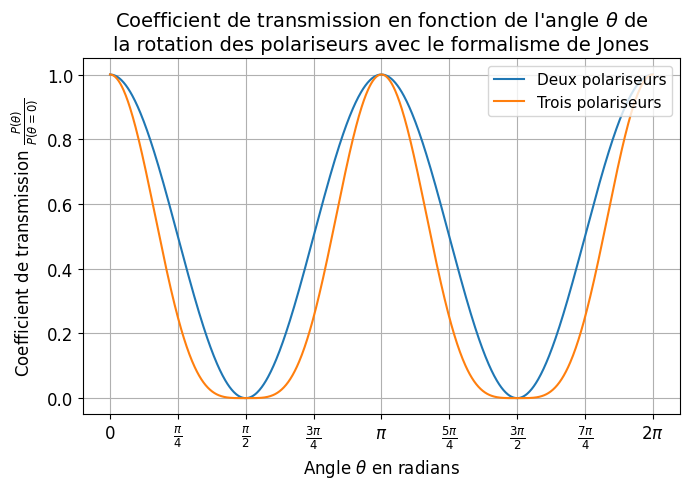

In [11]:
plt.figure(figsize=[7,5])
plt.plot(theta, P_jones_2pol, label='Deux polariseurs')
plt.plot(theta, P_jones_3pol, label='Trois polariseurs')


xticks = np.arange(0, 2 * np.pi + np.pi/4, np.pi/4)
xtick_labels = [format_tick_label(i) for i in range(9)]

plt.xticks(xticks, xtick_labels, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Angle $\\theta$ en radians", fontsize=12)
plt.ylabel("Coefficient de transmission $\\frac{P(\\theta)}{P(\\theta=0)}$", fontsize=12)
plt.grid()
plt.title("Coefficient de transmission en fonction de l'angle $\\theta$ de\nla rotation des polariseurs avec le formalisme de Jones", fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.savefig("coeff_jones.png")
plt.show()